In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [7]:
temperature = ctrl.Antecedent(np.arange(20, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
result = ctrl.Consequent(np.arange(20, 51, 1), 'result', defuzzify_method='centroid')
temperature['normal'] = fuzz.trimf(temperature.universe, [20, 20, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 35, 50])
temperature['veryhot'] = fuzz.trimf(temperature.universe, [35, 50, 50])
humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['wet'] = fuzz.trimf(humidity.universe, [50, 100, 100])
result['low'] = fuzz.trimf(result.universe, [20, 20, 35])
result['medium'] = fuzz.trimf(result.universe, [20, 35, 50])
result['high'] = fuzz.trimf(result.universe, [35, 50, 50])

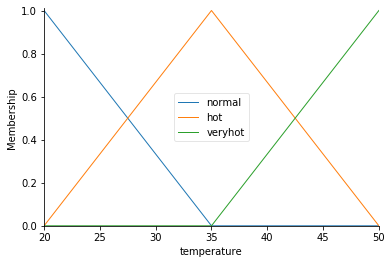

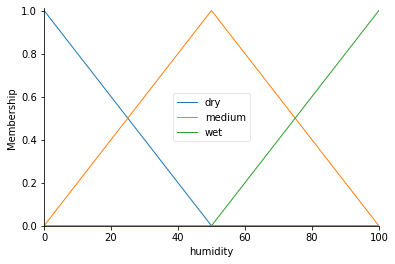

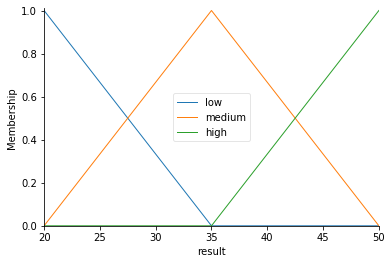

In [9]:
temperature.view()
humidity.view()
result.view()

C:\Users\DELL\Anaconda3\envs\project1\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\DELL\Anaconda3\envs\project1\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2769f427048>)

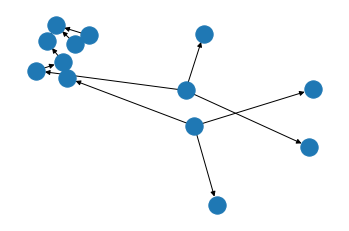

In [10]:
rule1 = ctrl.Rule(temperature['normal'] | humidity['wet'], result['low'])
rule2 = ctrl.Rule(temperature['veryhot'], result['high'])
rule3 = ctrl.Rule(temperature['hot'] | humidity['medium'], result['medium'])
rule4 = ctrl.Rule(temperature['normal'] | humidity['dry'], result['medium'])
rule1.view()


In [11]:
resulting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [12]:
resulting = ctrl.ControlSystemSimulation(resulting_ctrl)

In [16]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
resulting.input['temperature'] = 50
resulting.input['humidity'] = 5

# Crunch the numbers
resulting.compute()

37.52461951656223


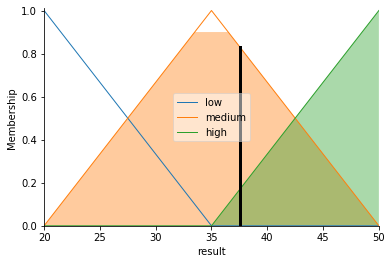

In [17]:
print(resulting.output['result'])
result.view(sim=resulting)